feature engineering - выделение вторичных признаков, более информативных на данных (в частности изображениях)

# **Решение задачи бинарной классификации №6**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

In [ ]:
n_train = len(x_train)                              # размер обучающей выборки
w = [0, -1]                                         # начальное значение вектора w
a = lambda x: np.sign(x[0] * w[0] + x[1] * w[1])    # решающее правило
N = 50                                              # максимальное число итераций
L = 0.1                                             # шаг изменения веса
e = 0.1                                             # небольшая добавка для w0 чтобы был зазор между разделяющей линией и граничным образом

last_error_index = -1                               # индекс последнего ошибочного наблюдения


In [ ]:
for n in range(N):
    for i in range(n_train):                   # перебор по наблюдениям
        if y_train[i] * a(x_train[i]) < 0:    # если ошибка классификации,
            w[0] = w[0] + L * y_train[i]      # то корректировка веса w0
            last_error_index = i

    Q = sum([1 for i in range(n_train) if y_train[i]*a(x_train[i]) < 0])
    if Q == 0:      # показатель качества классификации (число ошибок)
        break       # останов, если все верно классифицируем

if last_error_index > -1:
    w[0] = w[0] + e * y_train[last_error_index]

print(w)

[1.7000000000000004, -1]


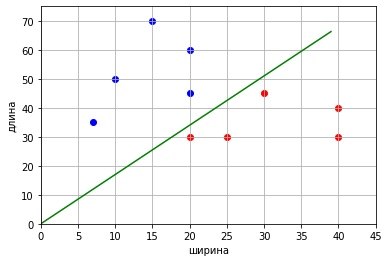

In [ ]:
line_x = list(range(max(x_train[:, 0])))    # формирование графика разделяющей линии
line_y = [w[0] * x for x in line_x]

x_0 = x_train[y_train == 1]                 # формирование точек для 1-го
x_1 = x_train[y_train == -1]                # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

# **Решение задачи бинарной классификации №7**

Функкции потерь при бинарной классификации

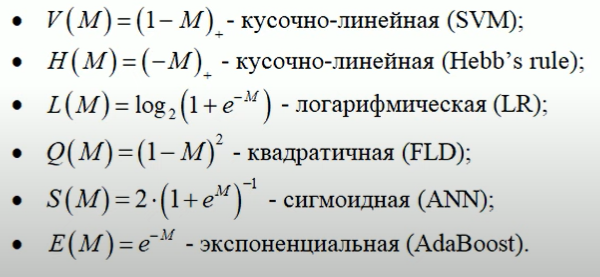

Тут была выбрана квадратичная функция потерь

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

In [ ]:
pt = np.sum([x * y for x, y in zip(x_train, y_train)], axis=0)
xxt = np.sum([np.outer(x, x) for x in x_train], axis=0)
w = np.dot(pt, np.linalg.inv(xxt))
print(w)

[ 0.05793234 -0.0346272   0.1912188 ]


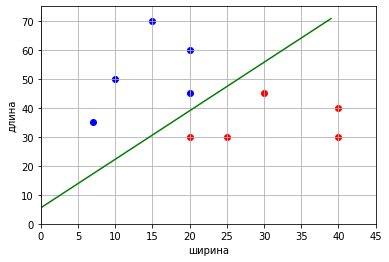

In [ ]:
line_x = list(range(max(x_train[:, 0])))    # формирование графика разделяющей линии
line_y = [-x*w[0]/w[1] - w[2]/w[1] for x in line_x]

x_0 = x_train[y_train == 1]                 # формирование точек для 1-го
x_1 = x_train[y_train == -1]                # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

# **SGD**

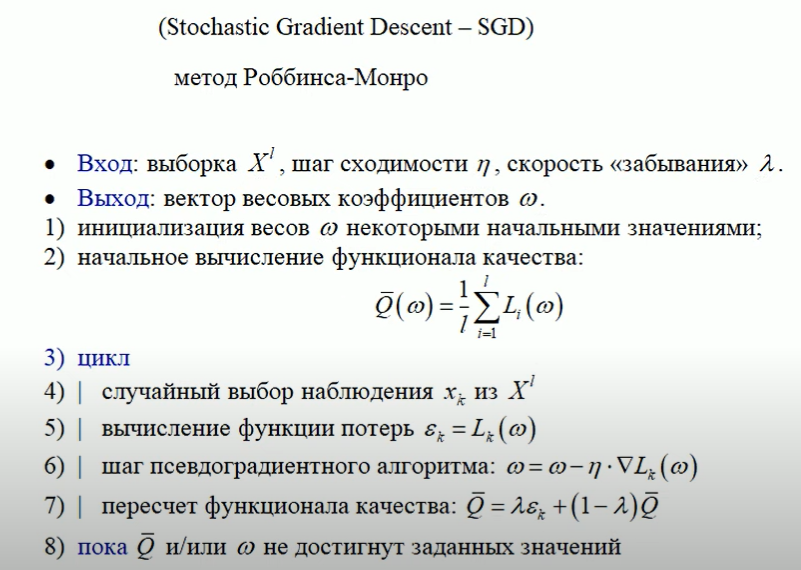

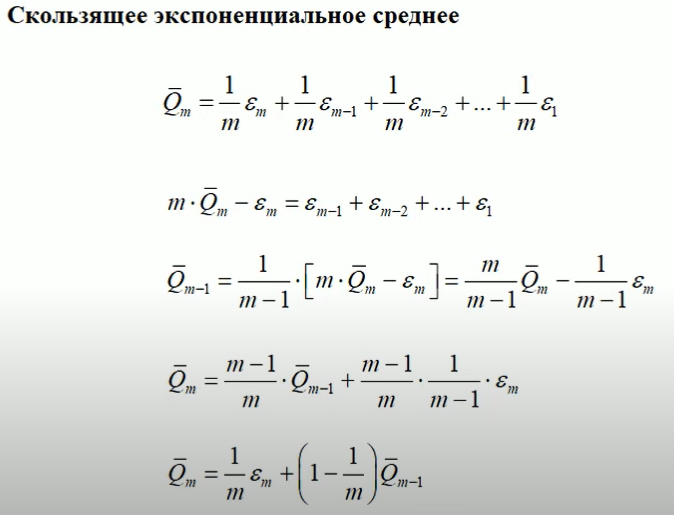

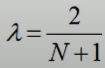

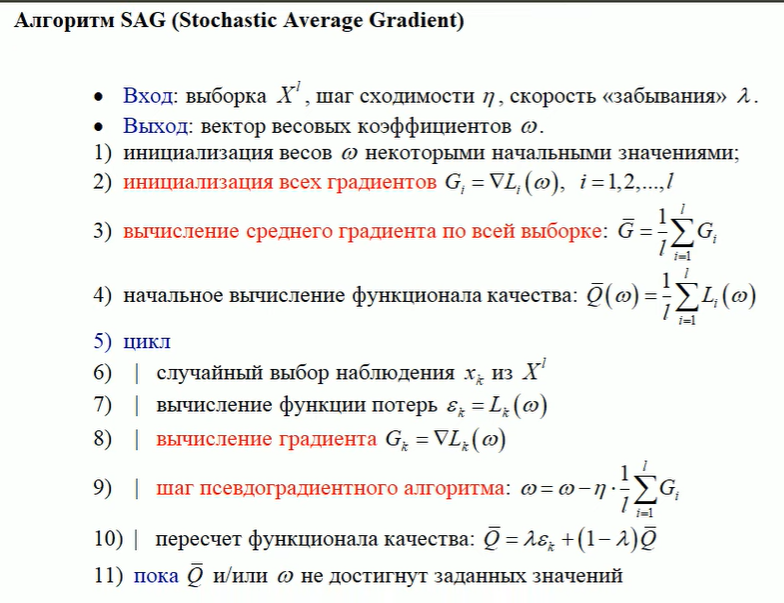

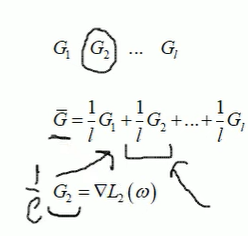

# **Пример использования SGD при бинарной классификации образов**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

In [ ]:
# производная сигмоидной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y

In [ ]:
# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

In [ ]:
n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = 0.0005  # шаг сходимости SGD
lm = 0.01  # скорость "забывания" для Q
N = 500  # число итераций SGD

In [ ]:
Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

In [ ]:
for i in range(N):
    k = np.random.randint(0, n_train - 1)  # случайный индекс
    ek = loss(w, x_train[k], y_train[k])  # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q  # пересчет показателя качества
    Q_plot.append(Q)

print(w)
print(Q_plot)

[ 0.31488298 -0.16833247  0.00568265]
[1.0, 1.0, 1.002154455407777, 1.0025888818443085, 1.0014016749428971, 1.0047390218458805, 1.0054504551097019, 1.0007123109187241, 1.0047167890451123, 1.0073567490924928, 1.0029077646681757, 0.9961409069991451, 1.0009486991084238, 0.993884233423489, 0.9858373823864893, 0.991444957524239, 0.9969625463691874, 1.0001478099084975, 0.997426067994172, 1.000063812787615, 0.9978092403968206, 0.9964975234107293, 0.9928843625581328, 0.987270390608237, 0.9935422516362004, 0.9981362152149355, 0.9909827725410164, 0.9950107153853309, 0.988241379156218, 0.9814280626172365, 0.9737099834226648, 0.9657206045072273, 0.9700609039856709, 0.9698924933899201, 0.9724678349375864, 0.9686864301066525, 0.9691718303052517, 0.9692575204036734, 0.969060852008238, 0.9659317305226429, 0.9656109083426755, 0.96243089718988, 0.9635322432545402, 0.9584323382601406, 0.9528926879971904, 0.9494558092738071, 0.9504964360863577, 0.9441832318892418, 0.9367401670193628, 0.9335992553488367, 0

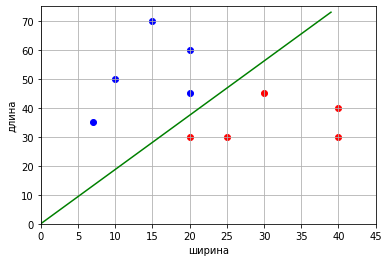

In [ ]:
line_x = list(range(max(x_train[:, 0])))  # формирование графика разделяющей линии
line_y = [-x * w[0] / w[1] - w[2] / w[1] for x in line_x]

x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == -1]  # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

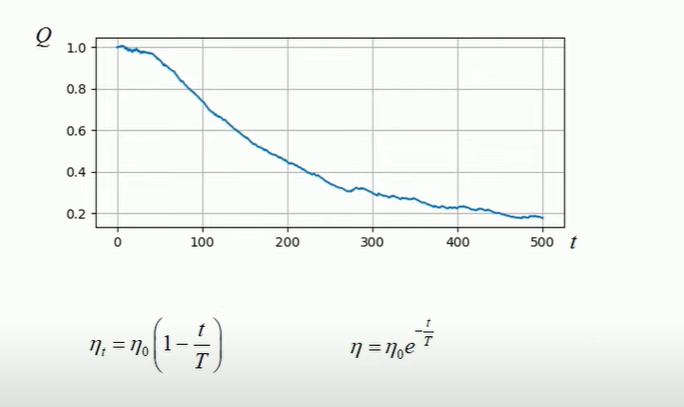

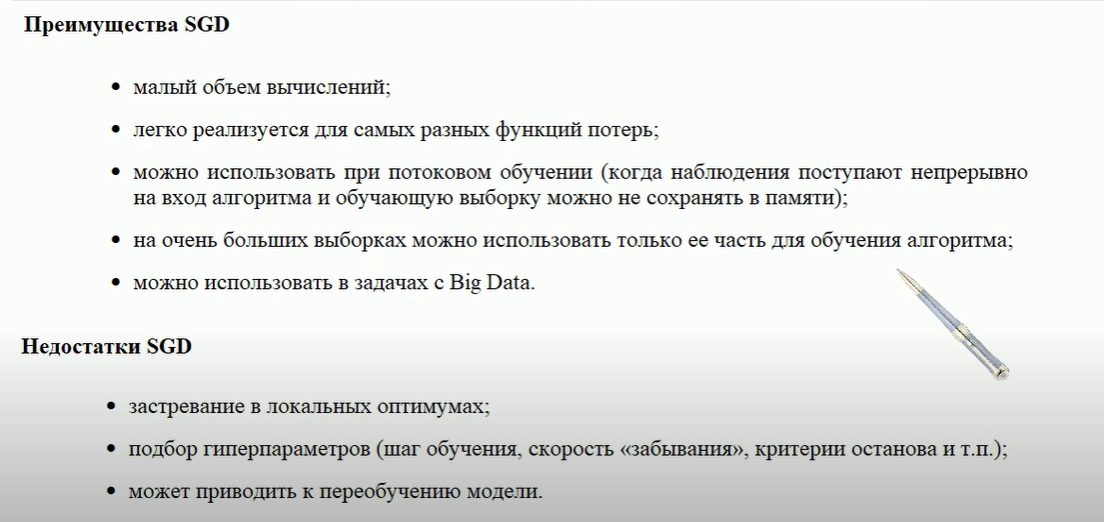

# **Расчет коэффициентов полиномиальной модели (Переобучение)**

In [ ]:
import numpy as np

In [ ]:
def predict_poly(x, koeff):
    res = 0
    xx = [x ** (len(koeff) - n - 1) for n in range(len(koeff))]

    for i, k in enumerate(koeff):
        res += k * xx[i]

    return res

In [ ]:
x = np.arange(0, 10.1, 0.1)
y = 1 / (1 + 10 * np.square(x))

x_train, y_train = x[::2], y[::2]

N = len(x)

z_train = np.polyfit(x_train, y_train, 10)
print(z_train)

[-1.26252985e-07  5.76781414e-06 -1.05030157e-04  9.09286288e-04
 -2.58708458e-03 -1.92393634e-02  2.13797583e-01 -8.96937855e-01
  1.95728683e+00 -2.19007649e+00  1.02203201e+00]


# **Пример работы L2-регуляризатора**

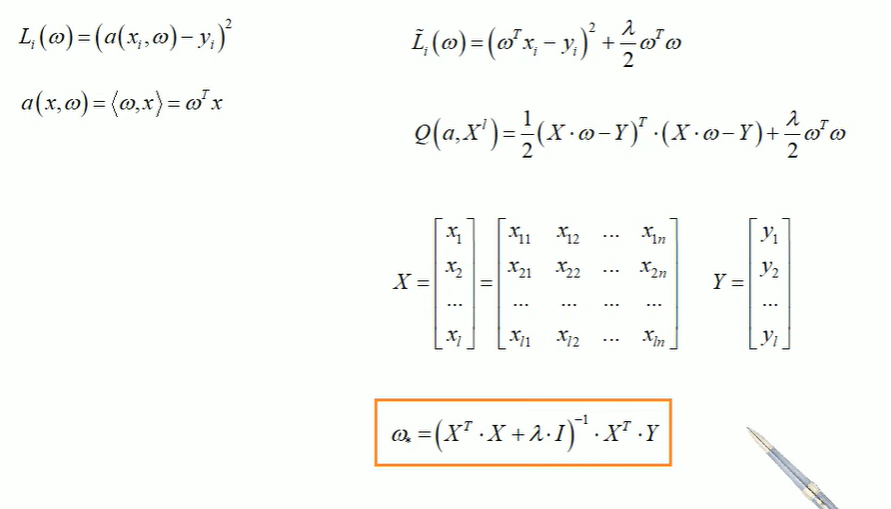

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
x = np.arange(0, 10.1, 0.1)
y = np.array([a ** 3 - 10 * a ** 2 + 3 * a + 500 for a in x])  # функция в виде полинома x^3 - 10x^2 + 3x + 500
x_train, y_train = x[::2], y[::2]
N = 13  # размер признакового пространства (степень полинома N-1)
L = 20  # при увеличении N увеличивается L (кратно): 12; 0.2   13; 20    15; 5000     параметр регуляризации

In [ ]:
X = np.array([[a ** n for n in range(N)] for a in x])  # матрица входных векторов
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])  # матрица lambda*I
IL[0][0] = 0  # первый коэффициент не регуляризуем
X_train = X[::2]  # обучающая выборка
Y = y_train  # обучающая выборка

In [ ]:
# вычисление коэффициентов по формуле w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(X_train.T @ X_train + IL)
w = Y @ X_train @ A
print(w)

[ 4.97803425e+02 -5.96312836e-01 -1.00348056e+00 -1.27496285e+00
 -1.09040632e+00 -1.84750490e-01  6.58413827e-01 -3.03586207e-01
  6.87833680e-02 -8.98349460e-03  6.89989000e-04 -2.90537400e-05
  5.18879759e-07]


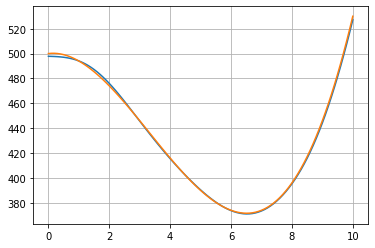

In [ ]:
# отображение исходного графика и прогноза
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy)
plt.plot(x, y)
plt.grid(True)
plt.show()

# **Пример работы L1_регуляризатора**

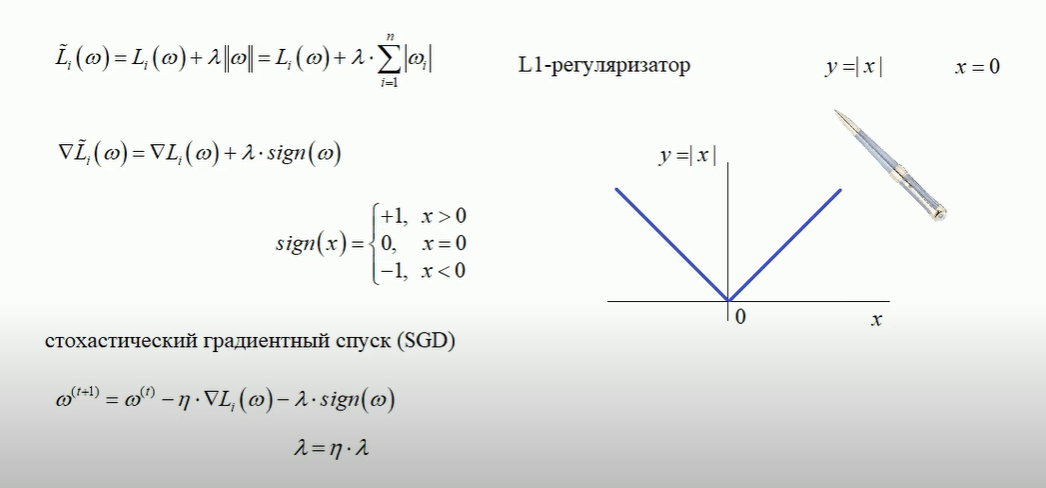

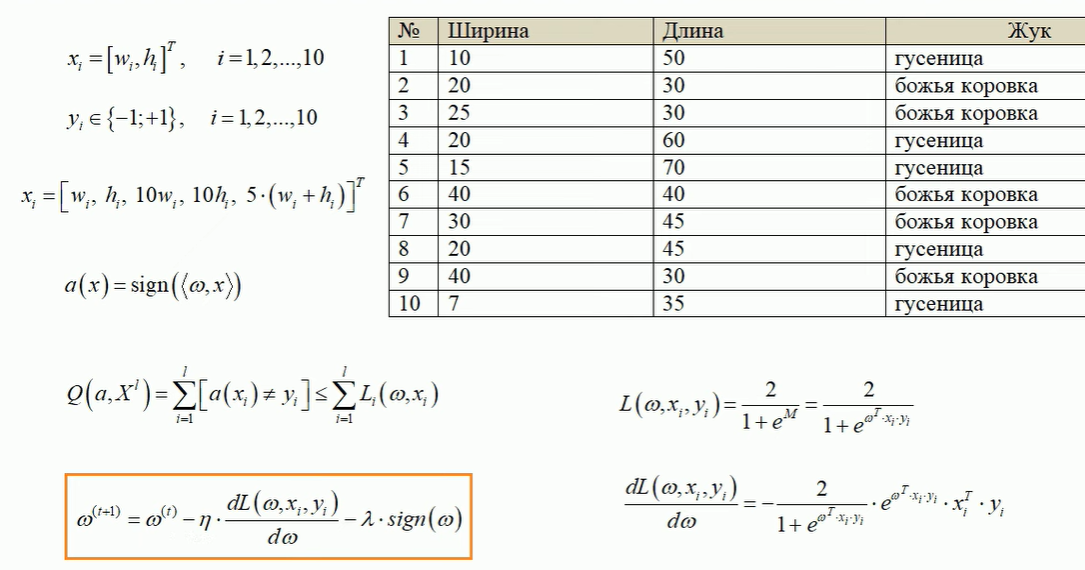

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

In [ ]:
# производная сигмоидной функции потерь по вектору w
def df(w, x, y):
    L1 = 1.0
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w)  ,# если np.sign(w) заменить на w, то полуычим L2-регуляризатор

In [ ]:
# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

In [ ]:
fn = len(x_train[0])
n_train = len(x_train)  # размер обучающей выборки
w = np.zeros(fn)        # начальные весовые коэффициенты
nt = 0.00001             # шаг сходимости SGD
lm = 0.01               # скорость "забывания" для Q
N = 5000                 # число итераций SGD

In [ ]:
Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

In [ ]:
for i in range(N):
    k = np.random.randint(0, n_train - 1)       # случайный индекс
    ek = loss(w, x_train[k], y_train[k])        # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q                  # пересчет показателя качества
    Q_plot.append(Q)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)]) # истинное значение эмпирического риска после обучения
print(w)
print(Q)

[ 6.58664626e-06 -4.88312121e-05  6.48558665e-02 -3.48583121e-02
 -3.61222829e-04]
0.03339968857687924


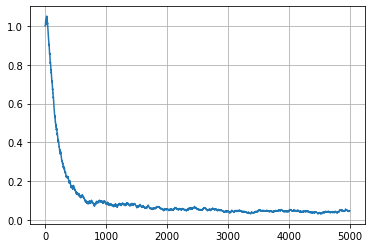

In [ ]:
plt.plot(Q_plot)
plt.grid(True)
plt.show()

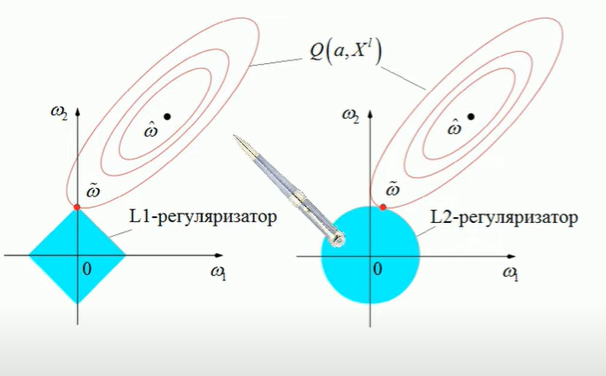

# **Пример реализации наивного гауссовского байесовского классификатора**

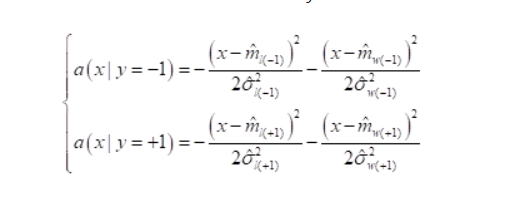

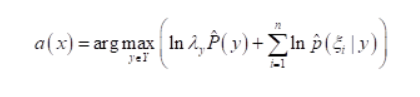

https://proproprogs.ru/ml/ml-bayesovskiy-vyvod-naivnaya-bayesovskaya-klassifikaciya

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

mw1, ml1 = np.mean(x_train[y_train == 1], axis=0)
mw_1, ml_1 = np.mean(x_train[y_train == -1], axis=0)

In [ ]:
# формула для вычисления дисперсии здесь немного другая 1/N*sum(...)
sw1, sl1 = np.var(x_train[y_train == 1], axis=0)
sw_1, sl_1 = np.var(x_train[y_train == -1], axis=0)

print('МО: ', mw1, ml1, mw_1, ml_1)
print('Дисперсии:', sw1, sl1, sw_1, sl_1)

МО:  31.0 35.0 14.4 52.0
Дисперсии: 64.0 40.0 27.439999999999998 146.0


In [ ]:
x = [40, 10]  # длинв, ширина жука
a_1 = lambda x: -(x[0] - ml_1) ** 2 / (2 * sl_1) - (x[1] - mw_1) ** 2 / (2 * sw_1)
a1 = lambda x: -(x[0] - ml1) ** 2 / (2 * sl1) - (x[1] - mw1) ** 2 / (2 * sw1)
y = np.argmax([a_1(x), a1(x)])

print('Номер класса (0 - гусеница, 1 - божья коровка): ', y)

Номер класса (0 - гусеница, 1 - божья коровка):  0



# **Гауссовский байесовский классификатор**

https://proproprogs.ru/ml/ml-gaussovskiy-bayesovskiy-klassifikator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(1)

# исходные параметры распределений двух классов
r1 = 0.8
D1 = 1.0
mean1 = [0, -3]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.7
D2 = 2.0
mean2 = [0, 3]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

In [ ]:
# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

In [ ]:
# вычисление оценок МО и ковариационных матриц
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

In [ ]:
# модель гауссовского байесовского классификатора
Py1, L1 = 0.5, 1  # вероятности появления классов
Py2, L2 = 1 - Py1, 1  # и величины штрафов неверной классификации

b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(
    np.linalg.det(v))

x = np.array([0, -4])  # входной вектор в формате (x, y)
a = np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2)])  # классификатор
print(a)

0


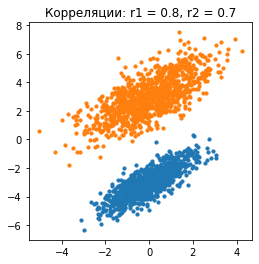

In [ ]:
# вывод графиков
plt.figure(figsize=(4, 4))
plt.title(f"Корреляции: r1 = {r1}, r2 = {r2}")
plt.scatter(x1[0], x1[1], s=10)
plt.scatter(x2[0], x2[1], s=10)
plt.show()